<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/Final_Project_Code1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Code 1-Bigmart Sales
###🧨ML project
objective:
1. Understand the Dataset & cleanup (if required).
2. Build Regression models to predict the sales of the products.
3. Also evaluate the models & compare their respective scores like R2, RMSE, etc.


📈Data: Bigmart Sales Dataset

🎈Suggesting process:
1. Data Preprocessing (missing values, outliers,  normalizing, encoding categorical data)
2. Feature Selection (correlation analysis, feature importance, using domain knowledge)
3. Model Selection (feel free to use any model out of scope the course, but have a reason to support why that model.)
4. Training and Evaluation (data splitting, use an appropriate evaluation metric like MSE, RMSE, or/and R2)
5. Cross Validation (Hyperparameter tuning)
6.  Interpretation and Insight (a short report in your notebook.)

## About DataSet:
This dataset presents a unique opportunity for data scientists to uncover the real factors that drive product sales.
By exploring this data, we can identify and evaluate the impact of product attributes and store characteristics that influence sales.
By analyzing weight, fat content, visibility, item types, maximum retail price (MRP), outlet size, location type and type of outlet features on sales data of 1559 products across 10 stores in different cities - all collected in 2013 by BigMart - we can create models that accurately predict product sales volumes. This dataset encourages us to dig deep and analyze how individual characteristics like item weight or size or visibility impact our ability to understand store performance measures like market share or average basket values. Finally it allows us to unpack the link between retailer strategies like promotions or deals with in-store success; giving us a true picture of what makes for successful products at different stores within different markets.

###Column name	Description:

1.Item_Weight:	Weight of the product in kilograms. (Numeric)

2.Item_Fat_Content:	The fat content of the product. (Categorical)

3.Item_Visibility:	The visibility of the product in store or online. (Numeric)

4.Item_Type:	The type of product, such as limited offers or no offer. (Categorical)

5.Item_MRP:	The maximum retail price of the product. (Numeric)

6.Outlet_Establishment_Year:	The year the outlet was established. (Numeric)

7.Outlet_Size:	The size of the outlet, either retail or supermarket. (Categorical)

8.Outlet_Location_Type:	The type of location of the outlet, such as urban or rural area. (Categorical)

9.Outlet_Type:	The type of outlet, such as sales departmental store or supermarket. (Categorical)

10.Item_Outlet_Sales:	The sales of the product in the outlet. (Numeric)

https://www.kaggle.com/datasets/uniabhi/bigmart-sales-data

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform

## Get Dataset

In [ ]:
df = pd.read_csv('bigmart.csv')

## EDA

In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated().sum()

0

## Null Handling

In [ ]:
df.isnull().sum().sort_values(ascending=False)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

## Missing Values on Heatmap

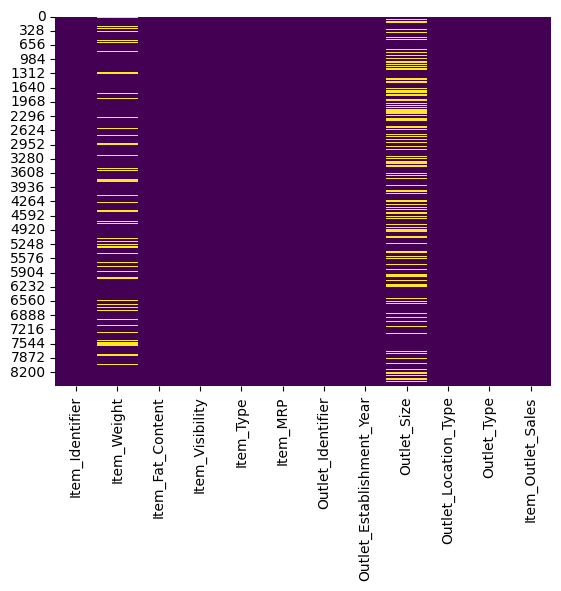

In [ ]:
sns.heatmap(df.isnull(),cmap = 'viridis',cbar=False);

In [ ]:
df = df.drop(['Item_Identifier','Outlet_Identifier'],axis =1)

In [ ]:
df.shape

(8523, 10)

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
Item_Weight_mean = df['Item_Weight'].mean()
Item_Weight_mean

12.857645184135976

In [ ]:
Item_Weight_median = df['Item_Weight'].median()
Item_Weight_median

12.6

In [ ]:
df['Item_Weight']=df['Item_Weight'].fillna(Item_Weight_mean)

In [ ]:
Outlet_Size_mode = df['Outlet_Size'].mode()[0]
Outlet_Size_mode

'Medium'

In [ ]:
df['Outlet_Size']=df['Outlet_Size'].fillna(Outlet_Size_mode)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


## Clean Data

In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['Low Fat',  'low fat'],'LF')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(['Regular',  'reg'],'Reg')

In [ ]:
df['Item_Fat_Content'].value_counts()

LF     5517
Reg    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [ ]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [ ]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

## Count Plot

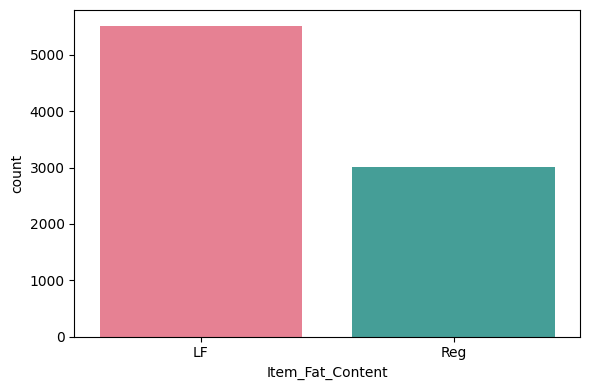

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content',data=df,palette='husl')
plt.tight_layout()
plt.show()

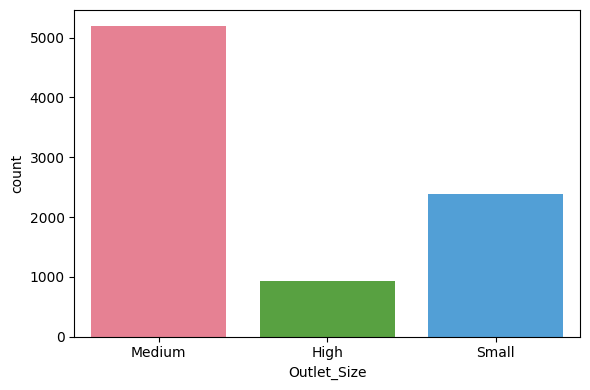

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Size',data=df,palette='husl')
plt.tight_layout()
plt.show()

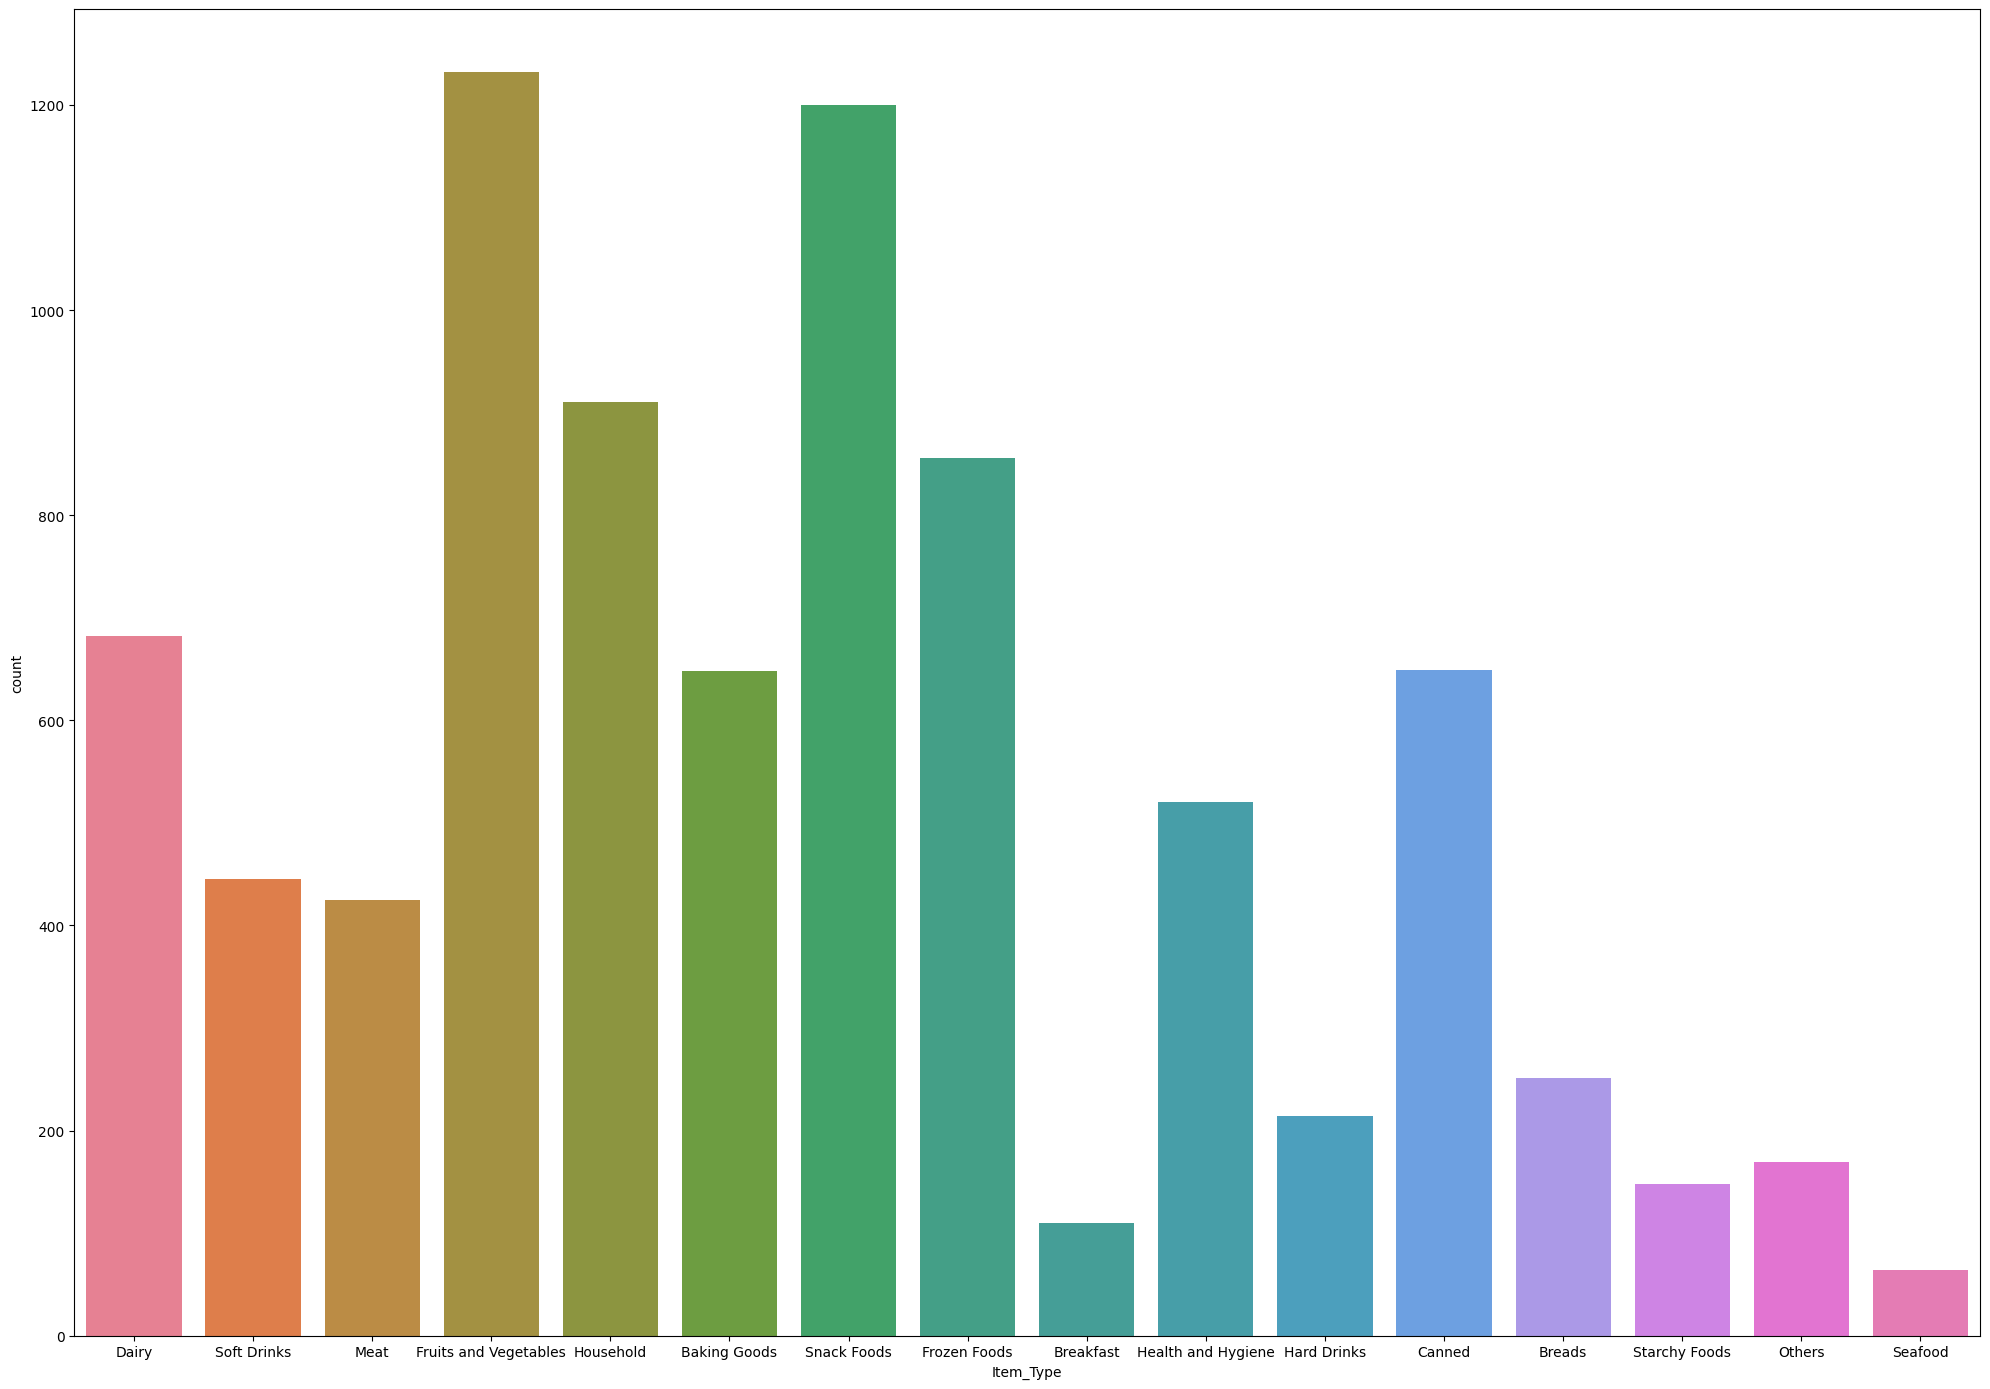

In [ ]:
plt.figure(figsize=(20,14))
sns.countplot(x='Item_Type',data=df,palette='husl')
plt.tight_layout()
plt.show()

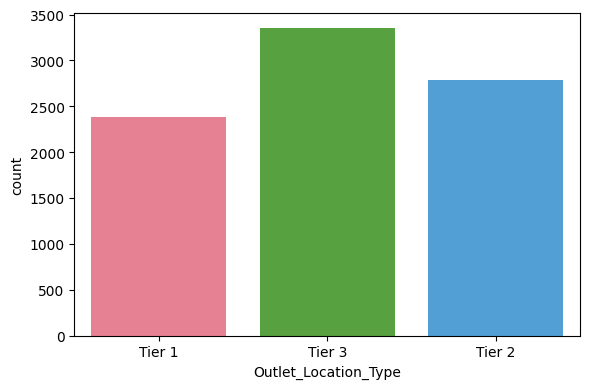

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet_Location_Type',data=df,palette='husl')
plt.tight_layout()
plt.show()

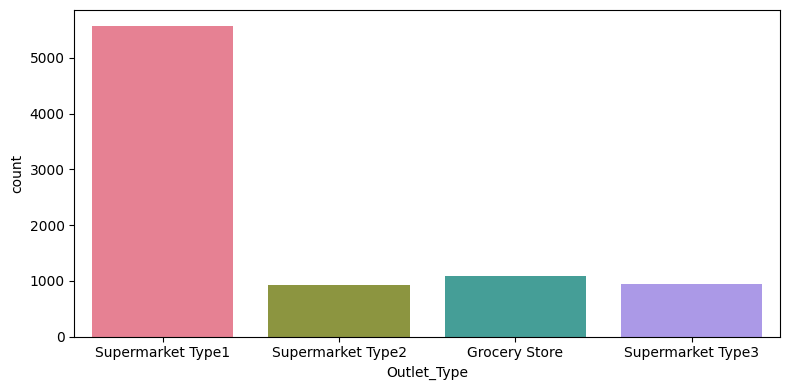

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Outlet_Type',data=df,palette='husl')
plt.tight_layout()
plt.show()

## Convert Categical to Numerical

In [ ]:
encoder = OneHotEncoder(sparse=False)

In [ ]:
columns = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Type','Item_Fat_Content']
def encode_columns(df, columns):
    for col in columns:
        # Fit and transform the data for the current column
        encoded_data = encoder.fit_transform(df[[col]].values.reshape(-1, 1))

        # Get the column names after one-hot encoding
        column_names = encoder.get_feature_names_out([col])

        # Create a DataFrame from the encoded data
        encoded_df = pd.DataFrame(encoded_data, columns=column_names)

        # Concatenate the encoded DataFrame with the original DataFrame
        df = pd.concat([df, encoded_df], axis=1)

        # Drop the original categorical column
        df.drop(columns=[col], inplace=True)

    return df


In [ ]:
columns = ['Outlet_Type','Outlet_Location_Type','Outlet_Size','Item_Type','Item_Fat_Content']
df = encode_columns(df, columns)

## About the defined function:

*   values.reshape(-1, 1)

This reshapes the array into a two-dimensional array with one column. The -1 in the reshape function is a placeholder that tells NumPy to infer the number of rows based on the length of the original array. The 1 specifies the number of columns.
*   get_feature_names_out([col])

In many cases, the encoder generates feature names automatically based on the unique categories in the original categorical variable. For example, if you have a categorical variable "Color" with categories "Red", "Green", and "Blue", after one-hot encoding, the resulting features might be named "Color_Red", "Color_Green", and "Color_Blue".

In [ ]:
df.shape

(8523, 33)

In [ ]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Fat_Content_LF,Item_Fat_Content_Reg
0,9.30,0.016047,249.8092,1999,3735.1380,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5.92,0.019278,48.2692,2009,443.4228,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,17.50,0.016760,141.6180,1999,2097.2700,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,19.20,0.000000,182.0950,1998,732.3800,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.93,0.000000,53.8614,1987,994.7052,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Visualization


## Box Plot

In [ ]:
num_columns=['Item_Outlet_Sales','Outlet_Establishment_Year','Item_MRP','Item_Visibility','Item_Weight']
def box_plot(df,num_columns):
  for col in num_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, data=df)
    plt.title(f'BoxPlot of {col}')
    plt.tight_layout()
    plt.xlabel(col)
    plt.show()

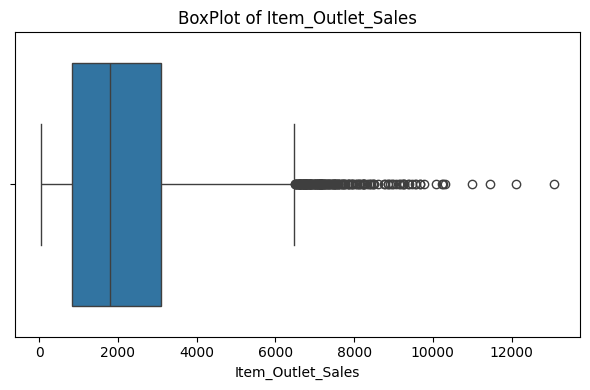

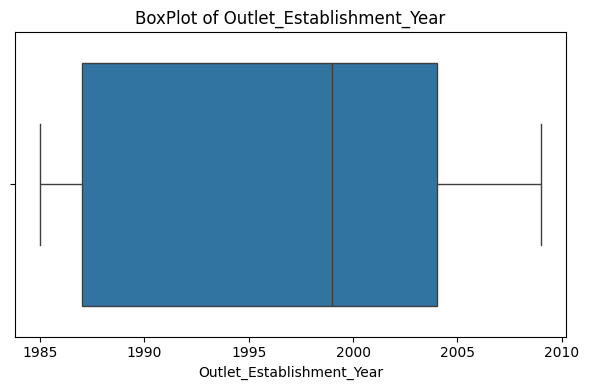

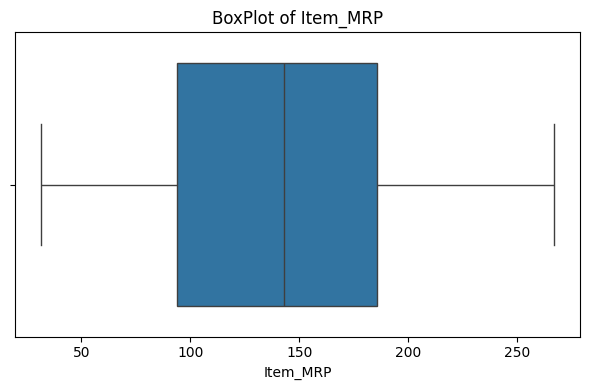

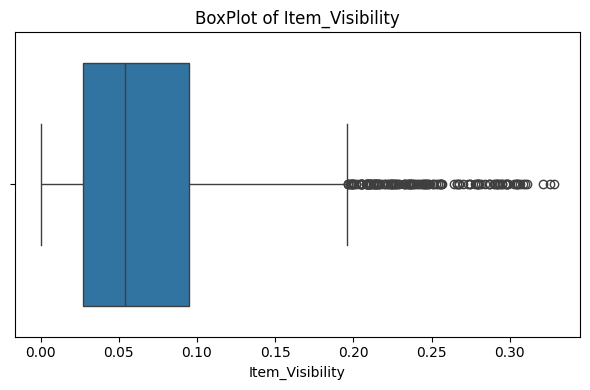

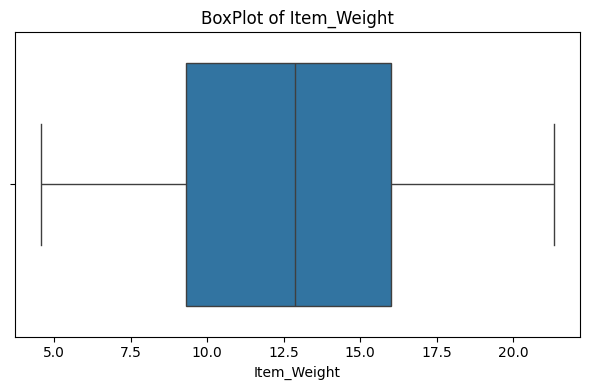

In [ ]:
num_columns=['Item_Outlet_Sales','Outlet_Establishment_Year','Item_MRP','Item_Visibility','Item_Weight']
box_plot(df,num_columns)

### We need to handle outliers in two columns including 'Item_Outlet_Sales' and 'Item_Visibility'

In [ ]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
Q1=df['Item_Outlet_Sales'].quantile(0.25)
Q3=df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3-Q1
upper_bound1 = Q3 + 1.5* IQR
lower_bound1 = Q1 - 1.5* IQR
print(upper_bound1)
print(lower_bound1)

6501.8699
-2566.3261


In [ ]:
Max_bound1 = 7500
print(Max_bound1)

7500


In [ ]:
outliers1 = np.where(df['Item_Outlet_Sales'] > 7500)[0]
print(len(outliers1))

76


In [ ]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
Q1=df['Item_Visibility'].quantile(0.25)
Q3=df['Item_Visibility'].quantile(0.75)
IQR = Q3-Q1
upper_bound2 = Q3 + 1.5* IQR
lower_bound2 = Q1 - 1.5* IQR
print(upper_bound2)
print(lower_bound2)

0.195979015
-0.07440424500000001


In [ ]:
outlets = np.where(df['Item_Visibility'] > 0.195979015)[0]
print(len(outlets))

144


In [ ]:
Max_bound2 = 0.25
print(Max_bound2)

0.25


In [ ]:
outliers2 = np.where(df['Item_Visibility'] > 0.25)[0]
print(len(outliers2))

55


## Replace Outlier Values with Max_Bound Value

In [ ]:
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].apply(lambda x :Max_bound1 if x > upper_bound1 else x )

In [ ]:
df['Item_Visibility']=df['Item_Visibility'].apply(lambda x :Max_bound2 if x > upper_bound2 else x )

In [ ]:
df['Item_Outlet_Sales'].describe()

count    8523.000000
mean     2178.095510
std      1688.427116
min        33.290000
25%       834.247400
50%      1794.331000
75%      3101.296400
max      7500.000000
Name: Item_Outlet_Sales, dtype: float64

## New Box Plot

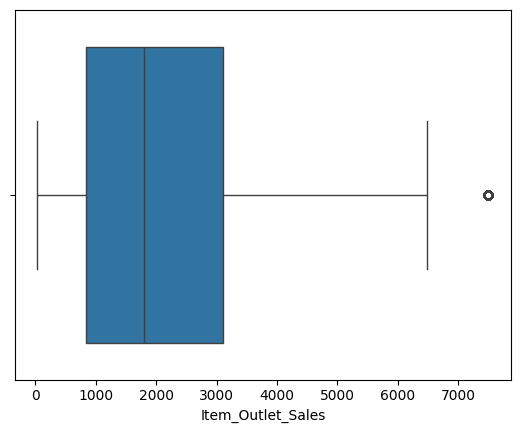

In [ ]:
sns.boxplot(data = df,x ='Item_Outlet_Sales');

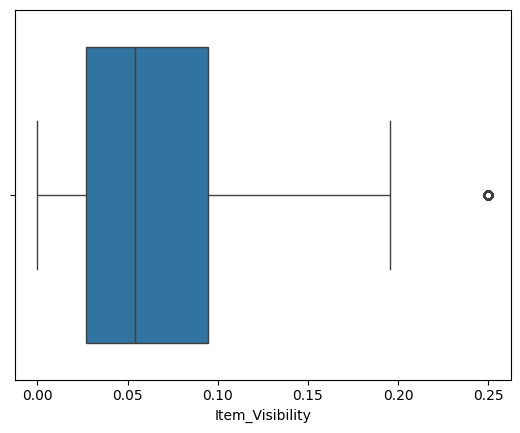

In [ ]:
sns.boxplot(data = df,x ='Item_Visibility');

### Distribution Plot

In [ ]:
sns.set_theme(style="whitegrid",palette="dark"),

(None,)

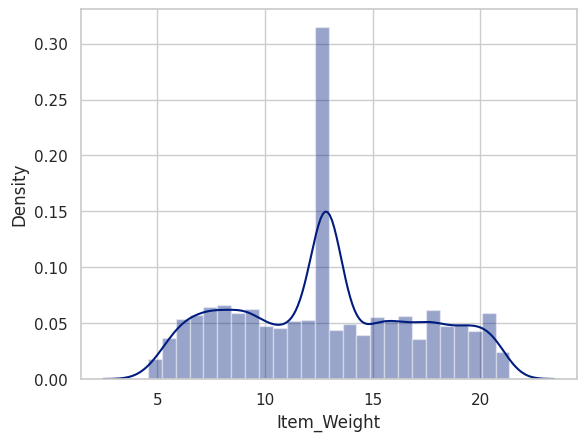

In [ ]:
sns.distplot(df['Item_Weight'])
plt.show();

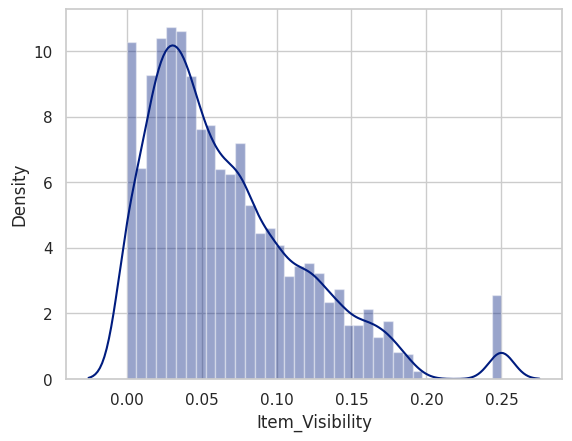

In [ ]:
sns.distplot(df['Item_Visibility'])
plt.show();

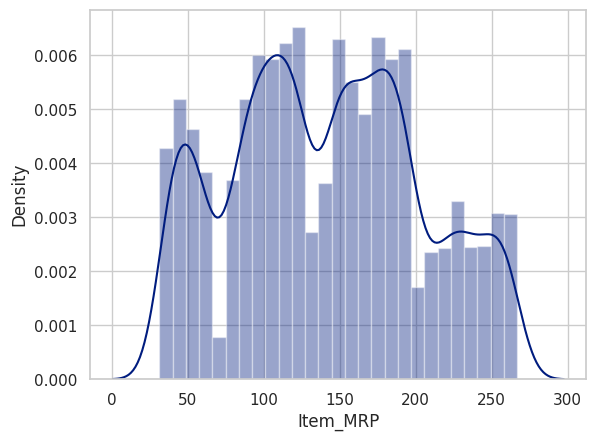

In [ ]:
sns.distplot(df['Item_MRP'])
plt.show();

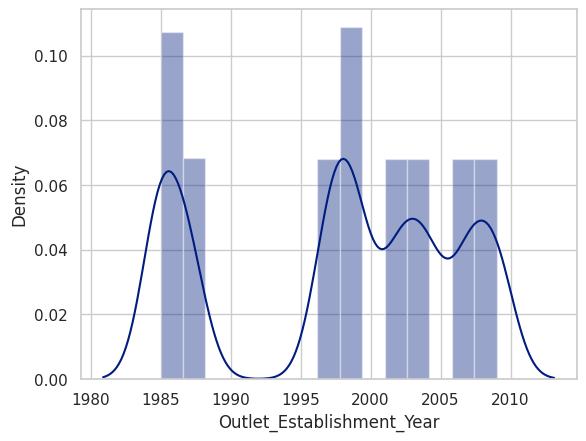

In [ ]:
sns.distplot(df['Outlet_Establishment_Year'])
plt.show();

### Pair Plot

In [ ]:
num_columns = df[['Item_Outlet_Sales','Outlet_Establishment_Year','Item_MRP','Item_Visibility','Item_Weight']]

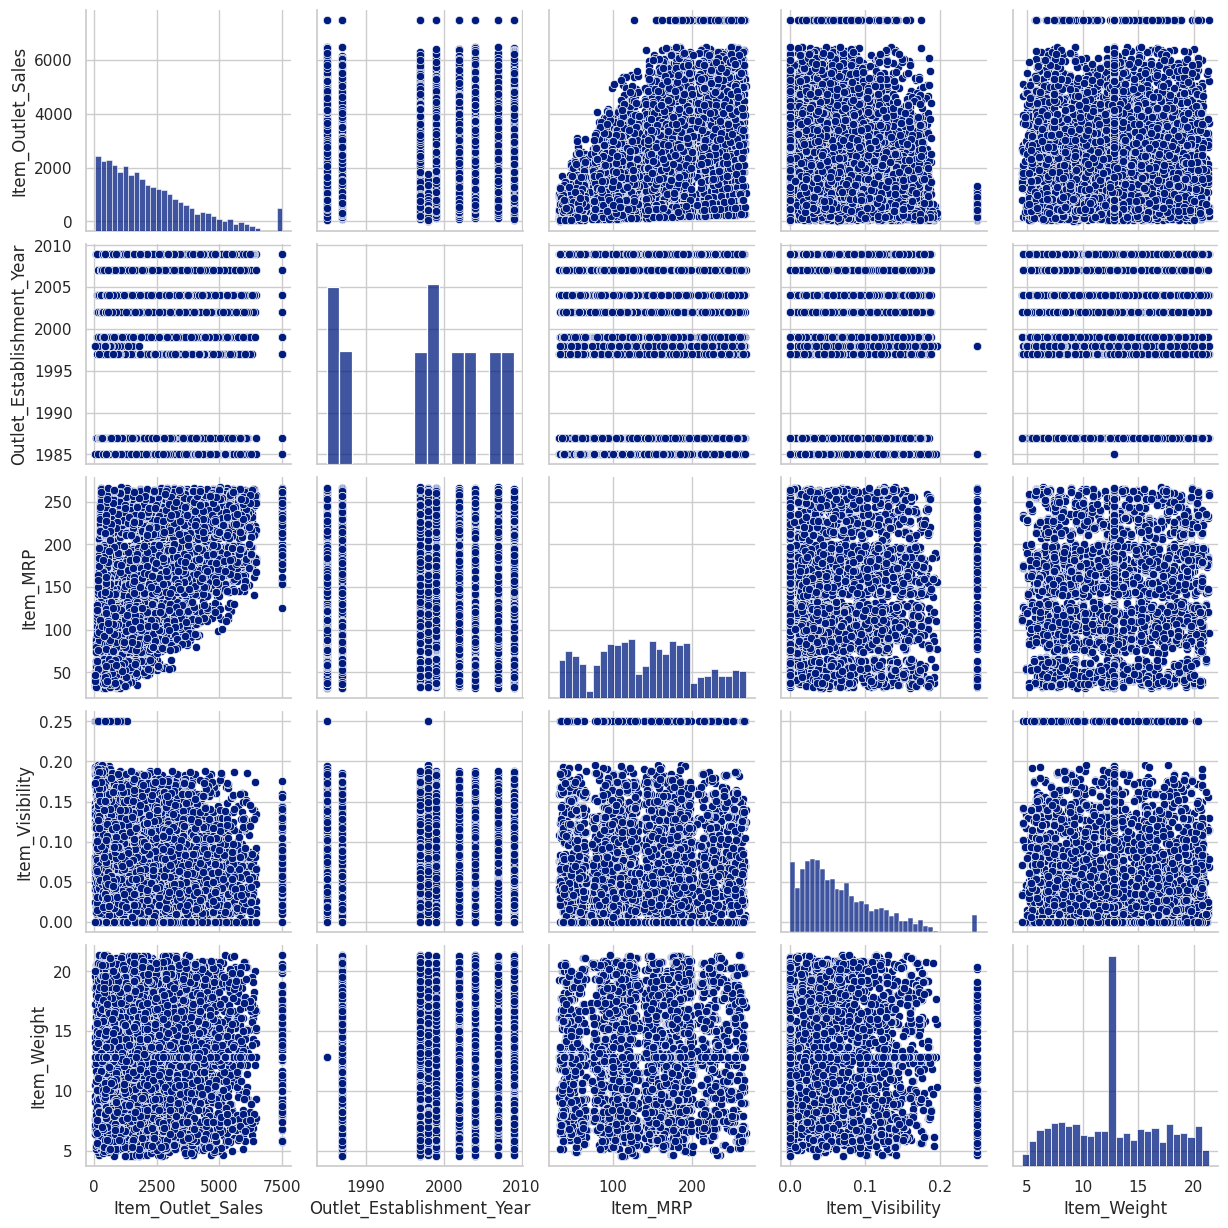

In [ ]:
sns.pairplot(num_columns);

In [ ]:
corr = num_columns.corr()

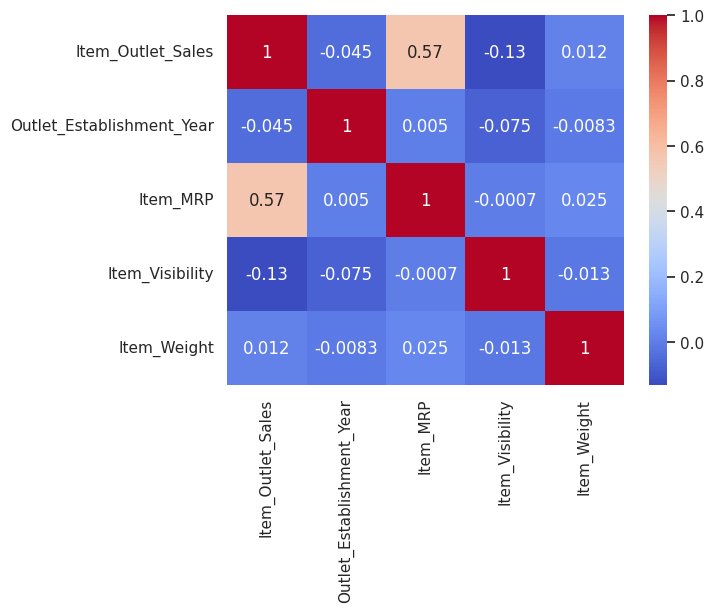

In [ ]:
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

## Build LinearRegression Model

In [ ]:
X = df.drop('Item_Outlet_Sales',axis = 1)
y = df['Item_Outlet_Sales']

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = LR.predict(X_test)

In [ ]:
R2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'R2 score is:', R2)
print('----------------------------------')
print(f'mse score is:', mse)
print('----------------------------------')
print(f'rmse score is:', rmse)

R2 score is: 0.566340371565537
----------------------------------
mse score is: 1165653.4370532692
----------------------------------
rmse score is: 1079.654313682518


## Results:


*   An R2 score of approximately 0.563 suggests that the model explains around 56.3% of the variance in the target variable.

*   The MSE score of approximately 1,188,135.61 indicates that, on average, the squared difference between the predicted and actual values is approximately 1,188,135.61.

*  The RMSE score of approximately 1090.02 suggests that, on average, the predicted values deviate from the actual values by approximately 1090.02 units.










## Cros Validation:

###Cross-validation is a powerful technique used to assess the generalization performance of a machine learning model and can be used to potentially improve the R2 score. It involves splitting the dataset into multiple subsets (folds), training the model on some folds, and evaluating it on the remaining fold. This process is repeated multiple times, rotating the evaluation fold each time.

In [ ]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
R2_scores = cross_val_score(LR, X, y, cv=kf, scoring='r2')
print("Average R2 score:", R2_scores.mean())

Average R2 score: 0.5636534419097172


## Build XGBoost

In [ ]:
xgb = xgb.XGBRegressor()

In [ ]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
R2 = r2_score(y_test,y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)

In [ ]:
print(f'R2 score is:', R2)
print('----------------------------------')
print(f'mse score is:', mse)

R2 score is: 0.5315065707631456
----------------------------------
mse score is: 1259284.7943864842


## RandomSearch

In [ ]:
param_dist = {'n_estimators':randint(100,1000),
              'max_depth':randint(3,10),
              'learning_rate': uniform(0.01,0.3)}

In [ ]:
rs =RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=5, cv=5, scoring='r2', random_state=42)

In [ ]:
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_iter=5,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78694a4933a0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78694aa55120>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78694a492c80>},
                   random_state=42, scoring='r2')

In [ ]:
print("Best Parameters:", rs.best_params_)

Best Parameters: {'learning_rate': 0.027425083650459835, 'max_depth': 7, 'n_estimators': 199}


In [ ]:
best_xgb_reg = rs.best_estimator_
test_score = best_xgb_reg.score(X_test, y_test)
print("Test R2 Score:", test_score)

Test R2 Score: 0.589926798337038


## Build Decision Tree

In [ ]:
DTR = DecisionTreeRegressor(max_depth=5,min_samples_split=5,min_samples_leaf=4)

In [ ]:
DTR.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [ ]:
y_pred_dtr = DTR.predict(X_test)

In [ ]:
R2 = r2_score(y_test,y_pred_dtr)
mse = mean_squared_error(y_test, y_pred_dtr)

In [ ]:
print(f'R2 score is:', R2)
print('----------------------------------')
print(f'mse score is:', mse)

R2 score is: 0.6015246084036909
----------------------------------
mse score is: 1071080.12676255


## Build RandomForest

In [ ]:
RF = RandomForestRegressor(n_estimators=500,max_depth=5,min_samples_split=10)

In [ ]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features='auto', min_samples_split=10,
                      n_estimators=500)

In [ ]:
y_pred_rf = RF.predict(X_test)

In [ ]:
R2 = r2_score(y_test,y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)

In [ ]:
print(f'R2 score is:', R2)
print('----------------------------------')
print(f'mse score is:', mse)

R2 score is: 0.6071141039776977
----------------------------------
mse score is: 1056055.8674125245


## RandomSearch

In [ ]:
param_dist ={'n_estimators': randint(100, 1000),
           'max_depth': randint(3, 10),
           'min_samples_split': randint(2, 20),
           'min_samples_leaf': randint(1, 20),
           'max_features': ['auto', 'sqrt', 'log2', None]}

In [ ]:
rs = RandomizedSearchCV(RF, param_distributions=param_dist, n_iter=5, cv=5, scoring='r2', random_state=42)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=5,
                                                   min_samples_split=10,
                                                   n_estimators=500),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x786947c7b880>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x786947c78160>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x786947c7a4d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78694a9ff790>},
                   random_state=42, scoring='r2')

In [ ]:
print("Best Parameters:", rs.best_params_)

Best Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 413}


In [ ]:
best_rf_reg = rs.best_estimator_
test_score = best_rf_reg.score(X_test, y_test)
print("Test R2 Score:", test_score)

Test R2 Score: 0.6071196568083164
